# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Your code here
housing = pd.read_csv('../data/boston_data.csv')
t_var = 'medv'
housing_cols = housing.columns

In [13]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [41]:
housing.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [42]:
print("There are no missing values, so let's move on the outliers")

There are no missing values, so let's move on the outliers


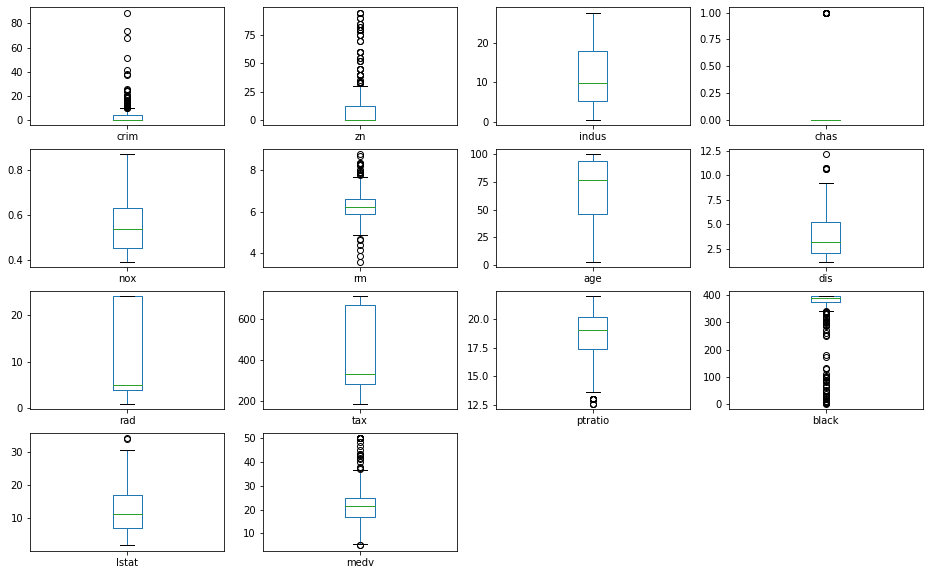

In [43]:
housing.plot(kind='box', subplots=True, layout=(4,4), figsize=(16,10), sharex=False, sharey=False)
plt.show()

In [34]:
print("The columns that strike the eye are 'chas' and 'dis', so let's investigate further")

The columns that strike the eye are 'chas' and 'dis', so let's investigate further


In [44]:
housing['chas'].value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

In [45]:
housing['dis'].value_counts()

5.4007    4
5.7209    4
6.8147    3
4.7211    3
6.0622    3
         ..
1.9142    1
2.0107    1
6.2267    1
2.2625    1
2.4527    1
Name: dis, Length: 339, dtype: int64

In [ ]:
print("'chas' seems to be categorical so let's leave it, but 'dis' it's a diferrent case")

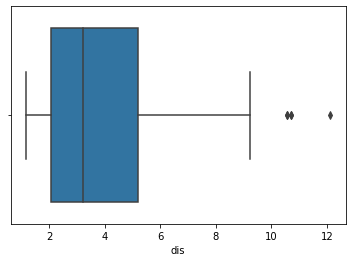

In [47]:
sns.boxplot(housing['dis'])

In [79]:
print("We see that there are a few outliers (bigger than 10) so let's drop them")

# r_to_drop = housing[housing['dis'] > 10].index
housing.drop(housing[housing['dis'] > 10].index, inplace=True)
print(housing)

We see that there are a few outliers (bigger than 10) so let's drop them
         crim    zn  indus  chas    nox     rm    age     dis   rad    tax  \
0     0.15876   0.0  10.81   0.0  0.413  5.961   17.5  5.2873   4.0  305.0   
1     0.10328  25.0   5.13   0.0  0.453  5.927   47.2  6.9320   8.0  284.0   
2     0.34940   0.0   9.90   0.0  0.544  5.972   76.7  3.1025   4.0  304.0   
3     2.73397   0.0  19.58   0.0  0.871  5.597   94.9  1.5257   5.0  403.0   
4     0.04337  21.0   5.64   0.0  0.439  6.115   63.0  6.8147   4.0  243.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
399   9.32909   0.0  18.10   0.0  0.713  6.185   98.7  2.2616  24.0  666.0   
400  51.13580   0.0  18.10   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
401   0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
402   0.02055  85.0   0.74   0.0  0.410  6.383   35.7  9.1876   2.0  313.0   
403   0.08244  30.0   4.93   0.0  0.428  6.481   18.5  6.1899   6.0  

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

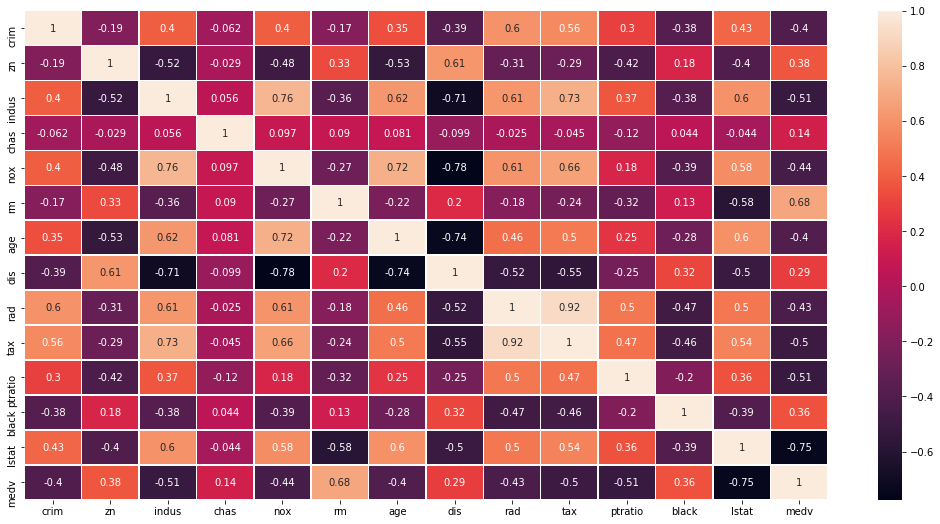

In [90]:
# Your plots here
plt.figure(figsize=(18,9))
sns.heatmap(housing.corr(), annot=True, linewidth=0.5)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [96]:
# Your response here
print("The most correlated variable is 'dis'. Without knowing what what it is exactly i will drop it, but it can be that it's fundamental to this study")

The most correlated variable is 'dis'. Without knowing what what it is exactly i will drop it, but it can be that it's fundamental to this study


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

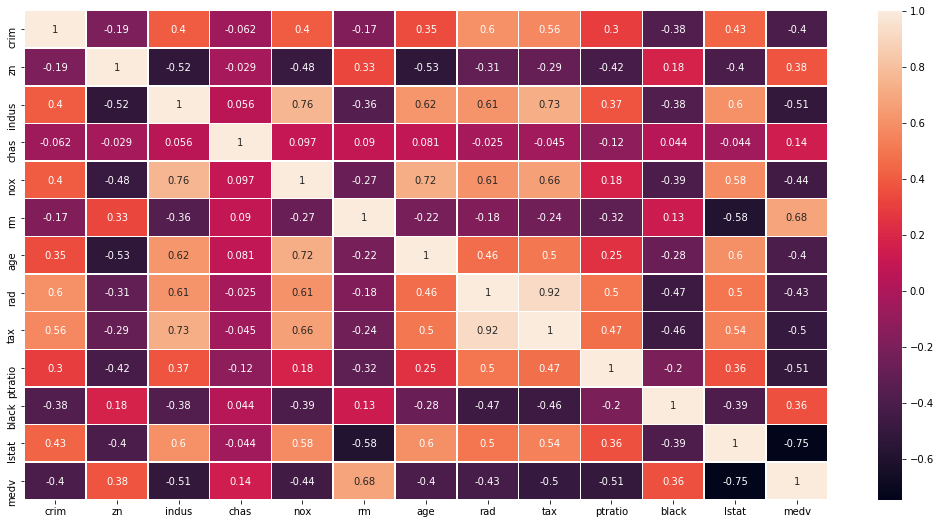

In [98]:
# Your response here
housing.drop(['dis'], axis=1, inplace=True)
plt.figure(figsize=(18,9))
sns.heatmap(housing.corr(), annot=True, linewidth=0.5)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [102]:
# Your code here
housing[t_var].describe()

count    399.000000
mean      22.312281
std        8.878574
min        5.000000
25%       17.050000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [113]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [114]:
# Your code here
from sklearn.model_selection import train_test_split

y = housing[t_var]
X = housing.drop(t_var, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(319, 12) (80, 12) (319,) (80,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [150]:
from sklearn.ensemble import RandomForestRegressor

# Five separate RFR here with the given max depths
depths = [1, 2, 4, 6, 8, 10]
RFR = {}
result = []
for i, d in enumerate(depths):
    RFR[i] = RandomForestRegressor(n_estimators=10, max_depth = d)
    RFR[i].fit(X_train, y_train)
    result.append(RFR[i])

Now, plot the score for each tree on the training set and on the testing set.

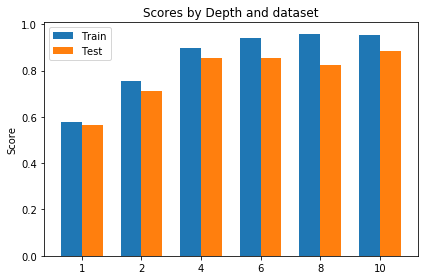

In [151]:
# Produce a plot with the score for the testing and training for the different max depths
labels = [r.max_depth for r in result]
y_pred_train = [performance_metric(y_train,r.predict(X_train)) for r in result]
y_pred_test = [performance_metric(y_test,r.predict(X_test)) for r in result]

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, y_pred_train, width, label='Train')
rects2 = ax.bar(x + width/2, y_pred_test, width, label='Test')
ax.set_ylabel('Score')
ax.set_title('Scores by Depth and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [149]:
# Your response here
print("From the plot above we see that there is an improvement on the score from depth 2 until 8 and after that we see a decrease")

From the plot above we see that there is an improvement on the score from depth 2 until 8 and after that we see a decrease


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
print("When max_depth = 1 the model suffers from High Variance")
print("When max_depth = 10 the model suffers from Low Variance")

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [156]:
# Your response here
print("I think 8 would be the best value for the max_depth")
RFR_6 = RandomForestRegressor(n_estimators=10, max_depth = 6)
RFR_6.fit(X_train, y_train)
RFR_6_pred = RFR_6.predict(X_test)
print("Score with depth 8", performance_metric(y_test,RFR_6_pred))
RFR_8 = RandomForestRegressor(n_estimators=10, max_depth = 8)
RFR_8.fit(X_train, y_train)
RFR_8_pred = RFR_8.predict(X_test)
print("Score with depth 8", performance_metric(y_test,RFR_8_pred))
RFR_10 = RandomForestRegressor(n_estimators=10, max_depth = 10)
RFR_10.fit(X_train, y_train)
RFR_10_pred = RFR_10.predict(X_test)
print("Score with depth 10",performance_metric(y_test,RFR_10_pred))
print("As per the scores of the tests the best fitting value for depth is 8")

I think 8 would be the best value for the max_depth
Score with depth 8 0.8465743902308166
Score with depth 8 0.8587874062792521
Score with depth 10 0.8451651368927735
As per the scores of the tests the best fitting value for depth is 8


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [162]:
# Your response here
print("I think the model can be used, but it's difficult to access it with the information at hand.")
print("We would need the definition of each parameter to decide if the model describes the house characteristics or not")
print("I think the data collected from 1978 can still be relevant because we can study the price variance over time")
print("The rural scenario would need different data.")
print("The houses will have completely different characteristics and each would influentiate the price in a certain way") 
print("Also because people that live in the rural area have different expectations for the houses")

I think the model can be used, but it's difficult to access it with the information at hand.
We would need the definition of each parameter to decide if the model describes the house characteristics or not
I think the data collected from 1978 can still be relevant because we can study the price variance over time
The rural scenario would need different data.
The houses will have completely different characteristics and each would influentiate the price in a certain way
Also because people that live in the rural area have different expectations for the houses
